In [2]:
import xarray as xr 
import xarray as dt 

import sys 
sys.path.append('/home/links/ct715/eddy_feedback/')
import functions.data_wrangling as data
import functions.eddy_feedback as ef 
import functions.plotting as plot 

In [3]:
# ds = xr.open_mfdataset('/disco/share/sit204/data_isca_intel_maths2/soc_ga3_do_simple_false_cmip_o3_bucket_qflux_co2_400_mid_alb_gfort_mm_mp/atmos_daily_interp_10_years.nc',
#                        parallel=True, chunks={'time': 30})

# # rename components
# rename = {'pfull': 'level', 'ucomp': 'u', 'vcomp': 'v', 'temp': 't'}
# ds = ds.rename(rename) 

# # choose selected variables
# variables = ['u','v','t']
# ds = ds[variables]

# ds = ef.calculate_epfluxes_ubar(ds)
# ds1 = ef.calculate_epfluxes_ubar(ds, primitive=False) 

# ds_new = xr.Dataset(data_vars={'u': ds.u, 'v': ds.v, 't': ds.t, 'ubar': ds.ubar,
#                                'div1_pr': ds.div1, 'div1_qg': ds1.div1})

In [4]:
ds = xr.open_mfdataset('/home/links/ct715/data_storage/isca/jacked_isca/realistic_uvt_ubar_ep-both.nc')
ds = ds.rename({'level': 'pressure', 'lat':'latitude'})

ds = data.seasonal_mean(ds, cut_ends=False)
ds = ds.isel(time=slice(1,-1))

ds = ds.sel(pressure=ds.pressure.values[::-1])
ds

<xarray.Dataset>
Dimensions:   (time: 9, pressure: 6, latitude: 64, lon: 128)
Coordinates:
  * lon       (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * latitude  (latitude) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * pressure  (pressure) float32 925.0 850.0 500.0 250.0 100.0 10.0
  * time      (time) object 0022-12-01 00:00:00 ... 0030-12-01 00:00:00
Data variables:
    u         (time, pressure, latitude, lon) float32 nan nan ... -14.3 -15.14
    v         (time, pressure, latitude, lon) float32 nan nan ... -18.6 -17.7
    t         (time, pressure, latitude, lon) float32 nan nan ... 216.8 216.8
    ubar      (time, pressure, latitude) float32 nan nan -3.632 ... 10.21 4.483
    div1_pr   (time, pressure, latitude) float64 nan nan nan ... 2.573 1.187
    div1_qg   (time, pressure, latitude) float64 nan nan nan ... 2.573 1.187

In [5]:
ds.time 

<xarray.DataArray 'time' (time: 9)>
array([cftime.Datetime360Day(22, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(23, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(24, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(25, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(26, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(27, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(28, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(29, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(30, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0022-12-01 00:00:00 ... 0030-12-01 00:00:00

In [6]:
r = plot.plot_efp_latitude(ds, take_seasonal=False)
r 

<xarray.DataArray (latitude: 32)>
array([4.30828471e-02, 1.27125214e-01, 8.59335859e-02, 5.50955873e-06,
       4.95383129e-02, 3.71058367e-03, 5.50413643e-02, 6.91172945e-02,
       9.74284149e-02, 1.67633833e-01, 1.54475252e-01, 6.04188891e-03,
       3.01576712e-03, 2.31294515e-03, 1.43341202e-01, 3.97053238e-01,
       6.42770318e-01, 7.33081440e-01, 5.81993560e-01, 5.62264612e-01,
       5.73308501e-01, 4.64323216e-01, 2.54919116e-01, 1.33541876e-01,
       2.35049945e-01, 5.08728469e-01, 6.88849355e-01, 7.00341120e-01,
       5.71215007e-01, 3.59889739e-01, 1.58232765e-01, 6.27727370e-02])
Coordinates:
  * latitude  (latitude) float64 1.395 4.186 6.977 9.767 ... 82.31 85.1 87.86

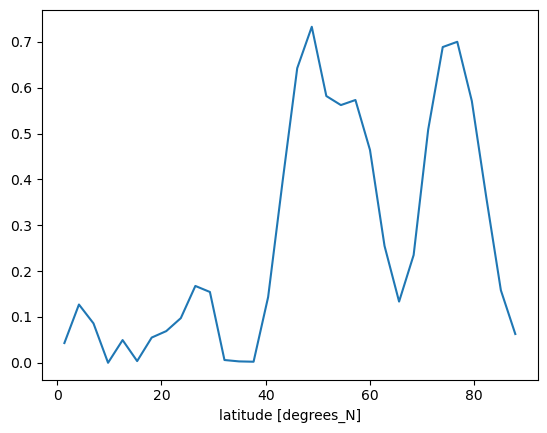

In [7]:
r.plot() 

## Break Reanalysis